In [1]:
import sys
import os
import json
import glob

# Añade el directorio padre al sys.path
sys.path.append(os.path.abspath("/eos/home-d/dcostasr/SWAN_projects/2025_data"))
sys.path.append(os.path.abspath("/eos/home-d/dcostasr/SWAN_projects/NiCf/offline_trigger"))
sys.path.append('/eos/home-d/dcostasr/SWAN_projects/software/hipy')

import hipy.pltext       as pltext
import matplotlib.pyplot as plt
import awkward           as ak
import numpy             as np

from src.read_data import process_and_write_parts, load_concatenated
from wcte.brbtools import sort_run_files, get_part_files, select_good_parts
from tqdm.notebook import tqdm

%load_ext autoreload
%autoreload 2

pltext.style()

In [2]:
run        = 1626
run_files  = sort_run_files(f"/eos/experiment/wcte/data/2025_commissioning/offline_data/{run}/WCTE_offline_R{run}S*P*.root")
part_files = get_part_files(run_files)
good_parts = select_good_parts(part_files, run_files)

with open('/eos/home-d/dcostasr/SWAN_projects/NiCf/offline_trigger/mmc_map_R1609.json') as f:
    mcc_map = json.load(f)

d = {}
for k,v in zip(mcc_map.keys(), mcc_map.values()):
    card, channel = [int(i) for i in str(int(k)/100).split(".")]
    d[(card, channel)] = v

mcc_map = d

Selecting Good Parts: 100%|██████████| 9/9 [00:01<00:00,  5.38it/s]


In [3]:
# process_and_write_parts(run_files, good_parts, mcc_map, max_card=118, max_chan=19)

In [4]:
data = load_concatenated(outdir="./tmp_parquet_snappy")

In [5]:
jump = 10
run_times   = ak.ravel(data["hit_times"])   [::jump]
run_events  = ak.ravel(data["event_number"])[::jump]
run_cards   = ak.ravel(data["card_ids"])    [::jump]
run_charges = ak.ravel(data["charges"])     [::jump]

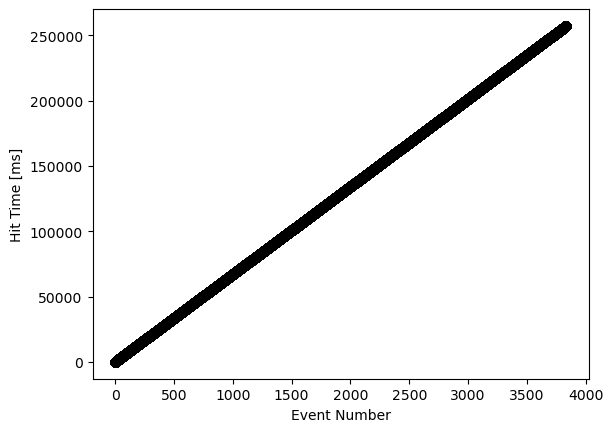

In [6]:
plt.scatter(run_events[::10], run_times[::10]/1e6);
plt.xlabel("Event Number");
plt.ylabel("Hit Time [ms]");

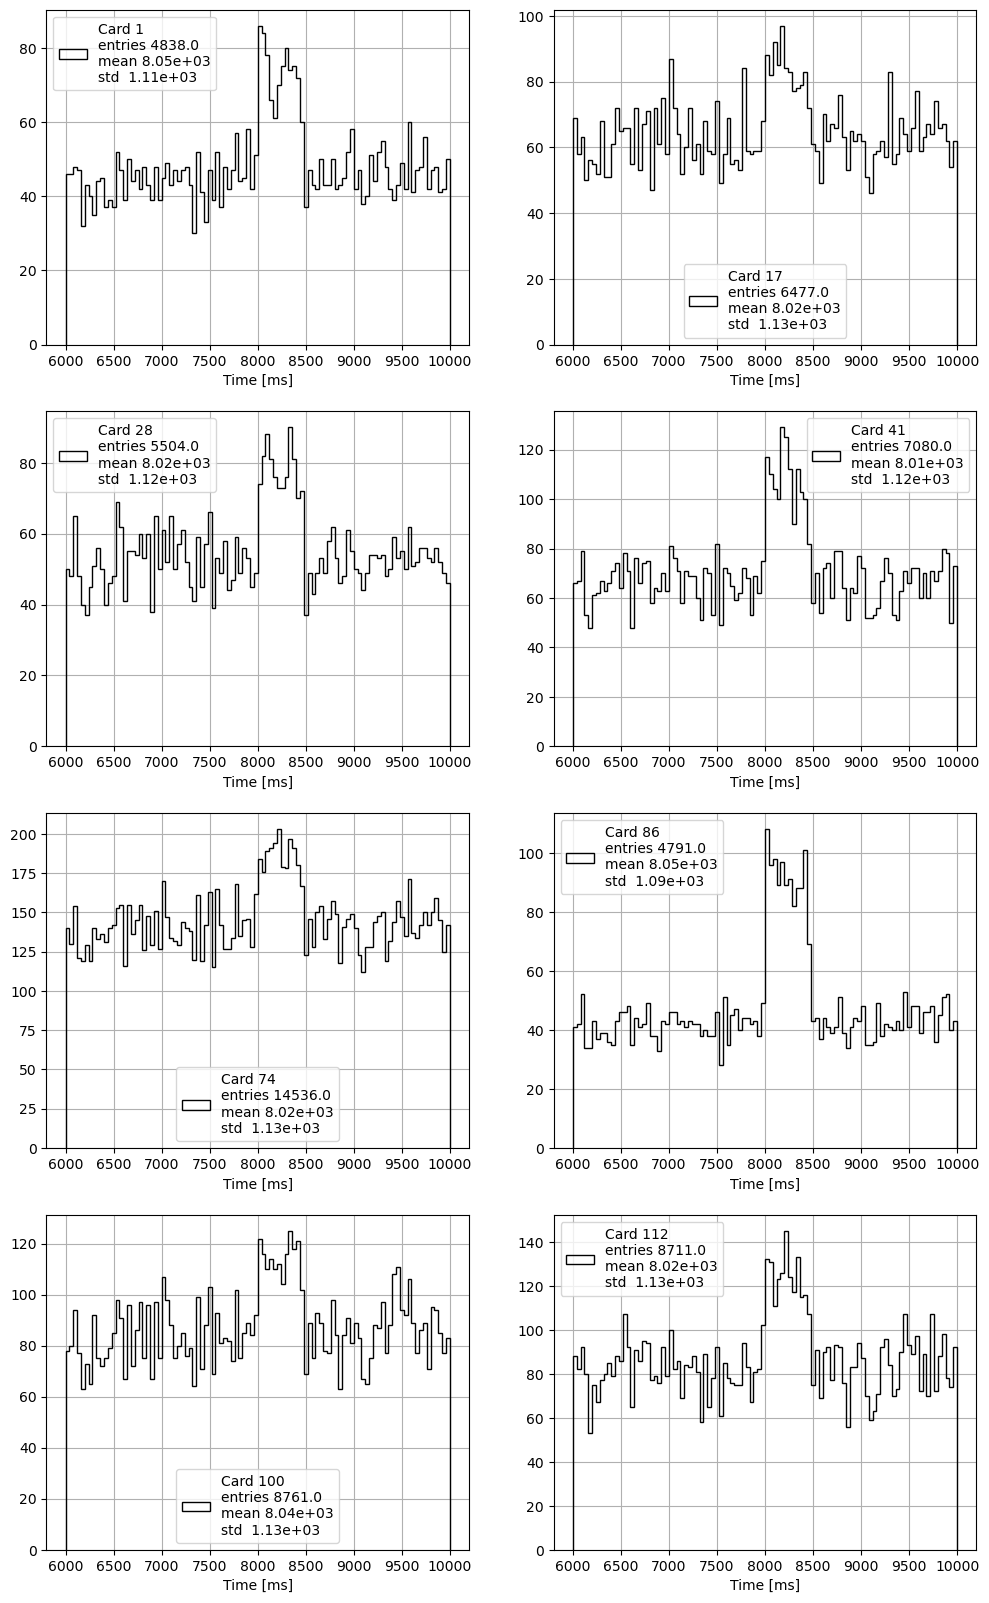

In [7]:
cards = np.unique(run_cards)
subplot = pltext.canvas(8)

for i, card in enumerate(cards[::11]):
    mask = (run_cards == card)
    card_hit_times = run_times[mask]

    subplot(i+1)
    pltext.hist(card_hit_times/1e6, 100, xylabels=("Time [ms]"), formate=".2e", label=f"Card {card}", range=(6000,10000));

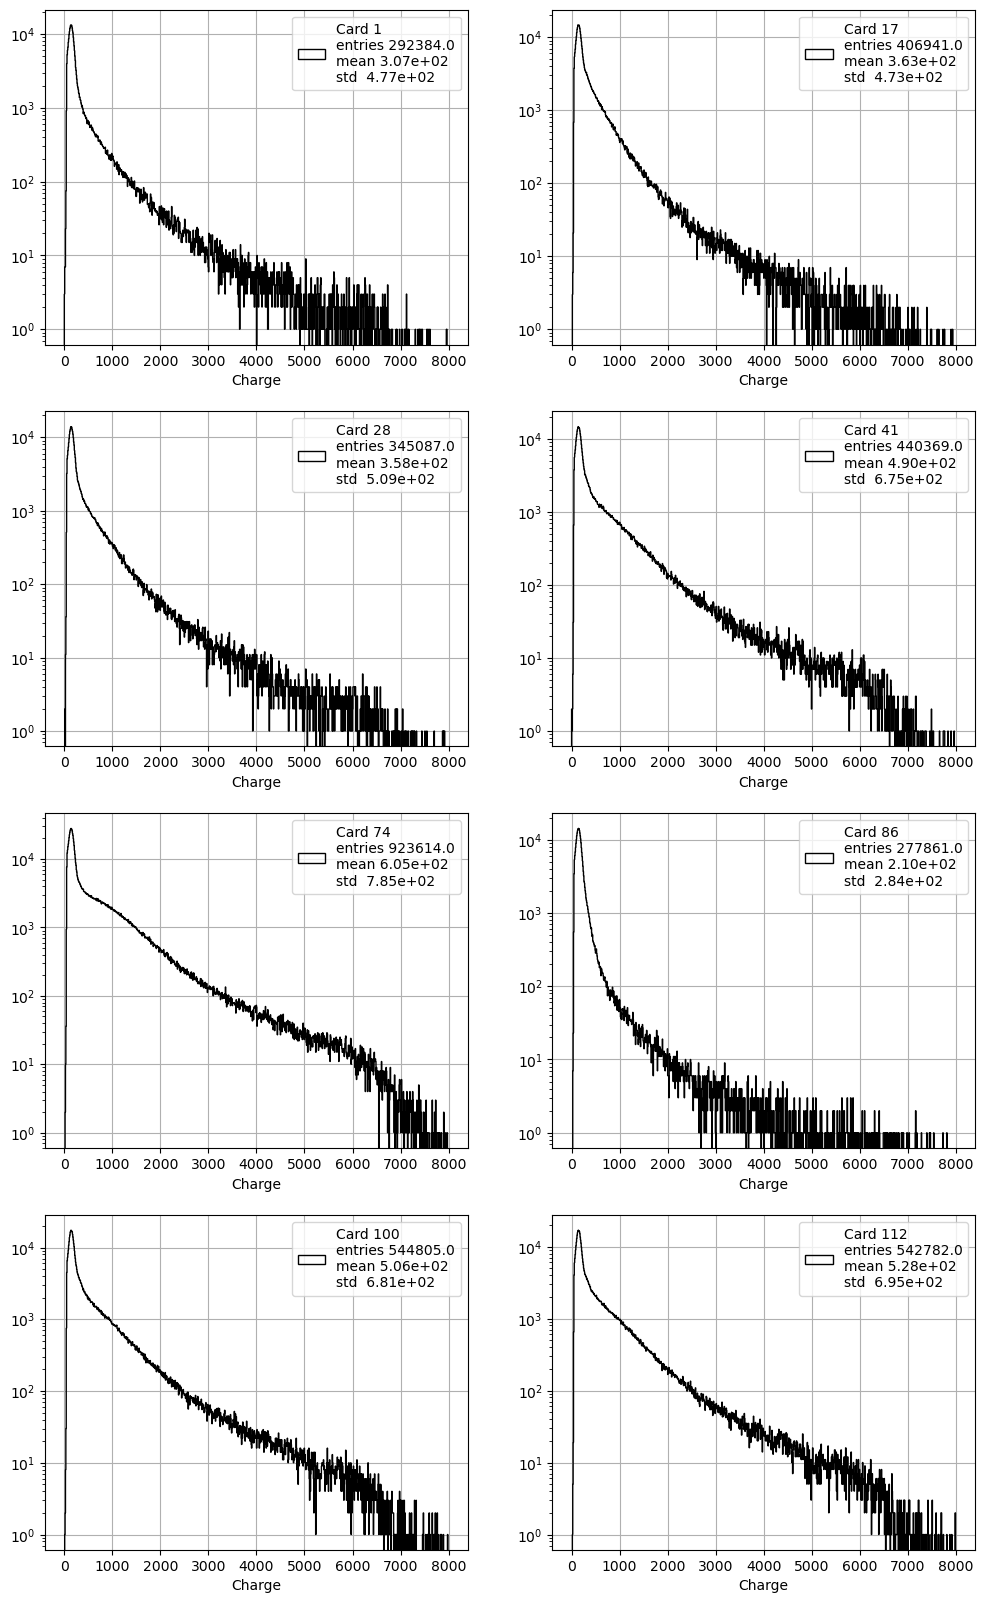

In [8]:
subplot = pltext.canvas(8)

for i, card in enumerate(cards[::11]):
    mask = (run_cards == card)
    card_hit_charges = run_charges[mask]

    subplot(i+1)
    pltext.hist(card_hit_charges, 1000, xylabels=("Charge"), formate=".2e", ylog=True, label=f"Card {card}", range=(0, 8e3))

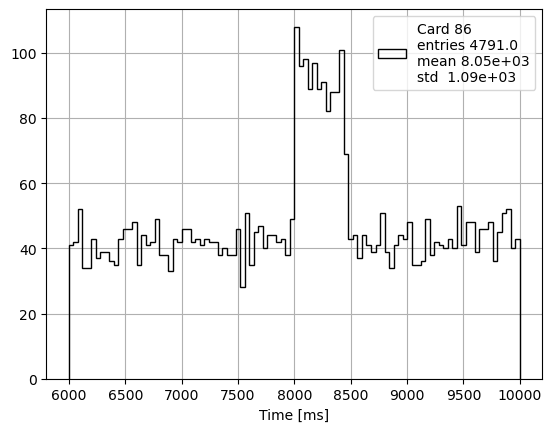

In [9]:
card = 86
mask = (run_cards == card)
card_hit_times = run_times[mask]

pltext.hist(card_hit_times/1e6, 100, xylabels=("Time [ms]"), formate=".2e", label=f"Card {card}", range=(6000,10000));

# Per Event Analysis

In [29]:
run_events  = data["event_number"]
run_times   = data["hit_times"]
run_charges = data["charges"]
run_times   = data["hit_times"]

70.35477466038913


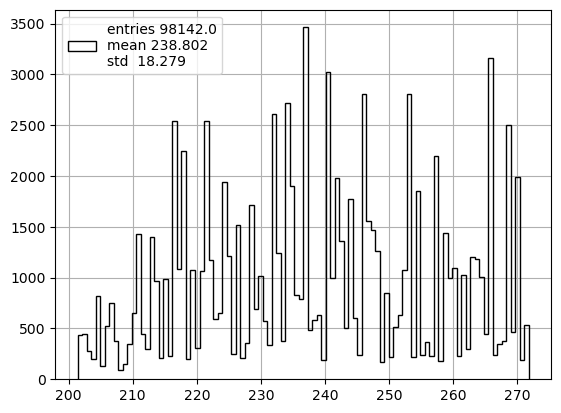

In [11]:
event = 3
pltext.hist(run_times[event]/1e6, 100);
print(ak.max(run_times[event]/1e6) - ak.min(run_times[event]/1e6))

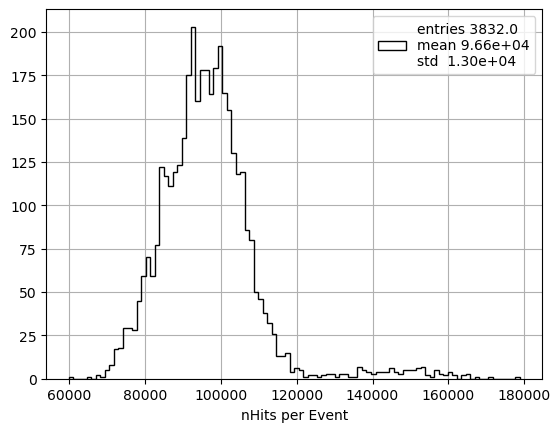

In [16]:
nHits_per_event = ak.count(run_events, axis=-1)
pltext.hist(nHits_per_event, 100, xylabels=("nHits per Event"), formate=".2e");

In [25]:
charge_per_event = ak.sum(run_charges, axis=-1)

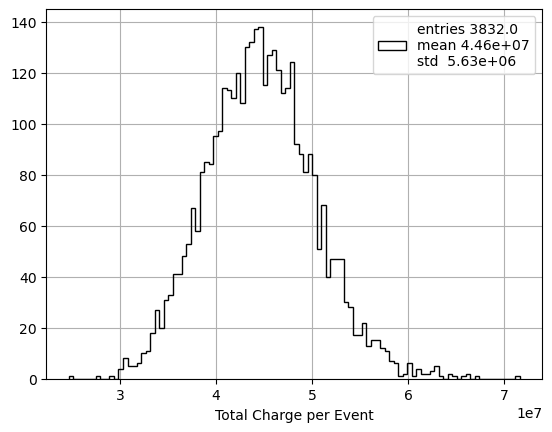

In [35]:
pltext.hist(charge_per_event, 100, xylabels=("Total Charge per Event"), formate=".2e");

In [31]:
hit_time_per_event = ak.mean(run_times, axis=-1)

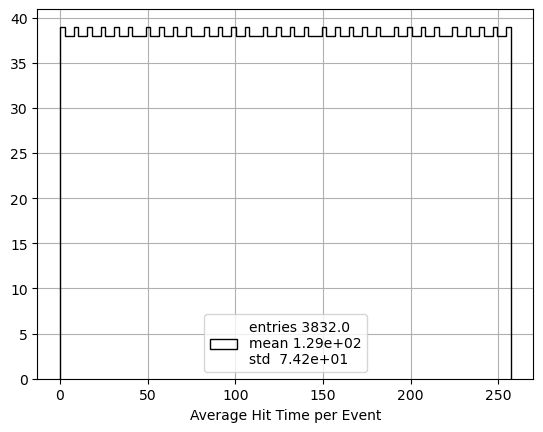

In [36]:
pltext.hist(hit_time_per_event/1e9, 100, xylabels=("Average Hit Time per Event"), formate=".2e");